## Réseaux de neurones convolutionnels 

Maintenant qu'on a vu comment fonctionnait une convolution, on va entraîner nos premiers réseaux de neurones convolutionnels avec Keras



Télécharger le dataset cifar 10 en utilisant le module datasets de keras

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data

data = load_data()

170508288/170498071 [==============================] - 2s 0us/step


Récupérer le jeu de train et de test dans des variables train et test

In [27]:
train, test = data

Afficher une ou deux images du jeu de train avec matplotlib 

In [28]:
import matplotlib.pyplot as plt

X_train, y_train = train
X_test, y_test = test

In [29]:
X_train.shape

(50000, 32, 32, 3)

In [30]:
X_test.shape

(10000, 32, 32, 3)

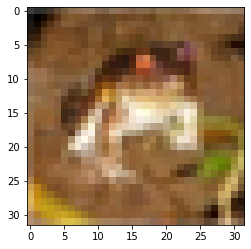

In [6]:
plt.imshow(X_train[0])

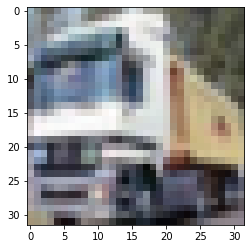

In [7]:
plt.imshow(X_train[1])

Si les données prennent des valeurs en 0 et 255 faire une normalisation des données

In [8]:
images_count, image_height, image_width, color_count = X_train.shape

In [9]:
X_train = X_train / 255
X_test = X_test / 255

Créer un premier réseau de neurones convolutionnel à trois couches 
- Une couche convolutionnelle avec 32 neurones et une activation relu
- Une couche Dense ave 300 neurones relu
- Une couche Dense finale à spécifier vous même

Il faudra penser à spécifier input_shape pour la première couche

In [10]:
import numpy as np
class_values = np.unique(data[0][1]) # or else len(set(y_train))
class_count = len(np.array(class_values))
class_count, class_values

(10, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, activation='relu', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
model.add(Flatten())
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

Compiler le modèle avec la bonne loss et l'optimizer sgd

In [132]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

Entrainer le modèle sur les données de train. Vous pourrez utiliser l'argument validation_data pour mesurer également la performance sur les données de test. Spécifier l'argument metrics pour afficher l'accuracy également

In [134]:
model_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
model_history

Epoch 1/10
1563/1563 [==============================] - 143s 91ms/step - loss: 1.7897 - accuracy: 0.3635 - val_loss: 1.5994 - val_accuracy: 0.4247
Epoch 2/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4998 - accuracy: 0.4734 - val_loss: 1.3823 - val_accuracy: 0.5078
Epoch 3/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.3315 - accuracy: 0.5321 - val_loss: 1.2949 - val_accuracy: 0.5358
Epoch 4/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.2165 - accuracy: 0.5738 - val_loss: 1.2203 - val_accuracy: 0.5663
Epoch 5/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.1253 - accuracy: 0.6086 - val_loss: 1.2230 - val_accuracy: 0.5638
Epoch 6/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.0479 - accuracy: 0.6359 - val_loss: 1.1355 - val_accuracy: 0.6021
Epoch 7/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.9765 - accuracy: 0.6613 - val_loss: 1

Faire un second modèle avec au moins une couche convolutionnelle supplémentaire et une couche dense supplémentaire (sans trop d'excès). Réentraîner le modèle. Les performances sont elles meilleures ? 

In [13]:
bigger_model = Sequential()
bigger_model.add(Conv2D(32, activation='relu', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
bigger_model.add(Conv2D(32, activation='relu', kernel_size=[3,3]))
bigger_model.add(Flatten())
bigger_model.add(Dense(units=300, activation='relu'))
bigger_model.add(Dense(units=300, activation='relu'))
bigger_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [14]:
bigger_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [15]:
bigger_model_history = bigger_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
bigger_model_history

Epoch 1/10
1563/1563 [==============================] - 25s 10ms/step - loss: 1.8061 - accuracy: 0.3506 - val_loss: 1.6884 - val_accuracy: 0.3896
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4859 - accuracy: 0.4710 - val_loss: 1.4483 - val_accuracy: 0.4805
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3267 - accuracy: 0.5303 - val_loss: 1.3323 - val_accuracy: 0.5266
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2045 - accuracy: 0.5735 - val_loss: 1.2362 - val_accuracy: 0.5581
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0869 - accuracy: 0.6150 - val_loss: 1.1335 - val_accuracy: 0.5955
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9751 - accuracy: 0.6549 - val_loss: 1.1446 - val_accuracy: 0.5946
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8619 - accuracy: 0.6972 - val_loss: 1.0855 -

L'accuracy semble s'être améliorée et la loss finale aussi (mais pas tellement en validation où les 2 sont pires)

## Le pooling 


Reprendre le modèle précédent et afficher le nombre de paramètre qu'il possède avec model.summary()

In [16]:
bigger_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 300)               7526700   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 7,630,154
Trainable params: 7,630,154
Non-

Faire un nouveau modèle qui reprend le modèle précédent en ajoutant une couche de pooling entre les deux couches convolutionnelles. Prendre pool size = (2, 2) 

Afficher à nouveau le nombre de paramètres du modèles. 



In [17]:
from tensorflow.keras.layers import MaxPooling2D

In [18]:
pooled_bigger_model_2_2 = Sequential()
pooled_bigger_model_2_2.add(Conv2D(32, activation='relu', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
pooled_bigger_model_2_2.add(MaxPooling2D(pool_size=(2,2)))
pooled_bigger_model_2_2.add(Conv2D(32, activation='relu', kernel_size=[3,3]))
pooled_bigger_model_2_2.add(Flatten())
pooled_bigger_model_2_2.add(Dense(units=300, activation='relu'))
pooled_bigger_model_2_2.add(Dense(units=300, activation='relu'))
pooled_bigger_model_2_2.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [19]:
pooled_bigger_model_2_2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [20]:
pooled_bigger_model_2_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               1622700   
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                      

Faire pareil et prend pool size = (4, 4) et afficher à nouveau le nombre de paramètres du modèle. 

In [21]:
pooled_bigger_model_4_4 = Sequential()
pooled_bigger_model_4_4.add(Conv2D(32, activation='relu', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
pooled_bigger_model_4_4.add(MaxPooling2D(pool_size=(4,4)))
pooled_bigger_model_4_4.add(Conv2D(32, activation='relu', kernel_size=[3,3]))
pooled_bigger_model_4_4.add(Flatten())
pooled_bigger_model_4_4.add(Dense(units=300, activation='relu'))
pooled_bigger_model_4_4.add(Dense(units=300, activation='relu'))
pooled_bigger_model_4_4.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [23]:
pooled_bigger_model_4_4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [25]:
pooled_bigger_model_4_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               240300    
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                      

Pouvez vous expliquer pourquoi le nombre de paramètre a varié de la manière dont il l'a fait ? 

- Sortie des couches convolutionnelles : (nb_neurones couche dense * (nb_params_sortie_couche_conv + 1) => + 1 pour le biais
- Same pour sortie d'une couche dense à une autre : (nb_neurones couche dense * (nb_params_sortie_couche_dense_preced + 1)
- Cela diminue le nb de params dans la dernière couche dense

Réentraîner le modèle de la même manière que le modèle précédent. Les performances ont-elles évoluées ? Comment ? 

In [26]:
pooled_bigger_model_4_4_history = pooled_bigger_model_4_4.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
pooled_bigger_model_4_4_history

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0194 - accuracy: 0.2612 - val_loss: 1.7884 - val_accuracy: 0.3572
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6131 - accuracy: 0.4200 - val_loss: 1.6558 - val_accuracy: 0.4104
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4313 - accuracy: 0.4882 - val_loss: 1.3722 - val_accuracy: 0.5072
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3329 - accuracy: 0.5263 - val_loss: 1.2947 - val_accuracy: 0.5351
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2646 - accuracy: 0.5494 - val_loss: 1.2601 - val_accuracy: 0.5579
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2102 - accuracy: 0.5705 - val_loss: 1.2512 - val_accuracy: 0.5551
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1551 - accuracy: 0.5908 - val_loss: 1.1458 - val_accura

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b859965-b858-4b8d-a841-009599aef86e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>